In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [10]:
# integration time and time sampling
t_final = 500
delta_t = 0.001

# The parameters theta and sigma
theta = 0.3
sigma = 0.1

# The time array1 of the trajectory1
time = np.arange(0, t_final, delta_t)

# Initialise the array1 y1
y1 = np.zeros(time.size)

# Generate a Wiener process
dw = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = time.size)

# Integrate the process
for i in range(1,time.size):
    y1[i] = y1[i-1] - theta*y1[i-1]*delta_t + sigma*dw[i]

# integration time and time sampling
t_final = 500
delta_t = 0.001

# The parameters theta and sigma
theta = 0.3
sigma = 0.1

# The time array of the trajectory
time = np.arange(0, t_final, delta_t)

# Initialise the array y
y2 = np.zeros(time.size)

# Generate a Wiener process
dw = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = time.size)

# Integrate the process
for i in range(1,time.size):
    y2[i] = y2[i-1] - theta*y2[i-1]*delta_t + sigma*dw[i]

In [11]:
#pdf
@njit
def PDF(data,nbins):

  maxi = np.max(data)
  mini = np.min(data)

  dx = (max(data) - min(data))/(nbins)
  
  pdf = np.zeros(nbins)
  axes = np.linspace(mini,maxi,nbins)
  Data = data - mini
  for i in range(len(data)):
    R = int(Data[i]/dx)
    pdf[R] += 1

  pdf = pdf / (np.sum(pdf)*dx)  

  return pdf,axes

#joint pdf
@njit
def jpdf(x,y,nbins):
  minx=np.min(x)
  maxx=np.max(x)
  miny=np.min(y)
  maxy=np.max(y)  
  dx = (max(x) - min(x))/(nbins)
  dy = (max(y) - min(y))/(nbins)

  pdf = np.zeros((nbins,nbins))
  axesx = np.linspace(minx,maxx,nbins)
  axesy = np.linspace(miny,maxy,nbins)
  Datax = x - minx
  Datay = y - miny
  for i in range(len(x)):
    Rx = int(Datax[i]/dx)
    Ry = int(Datay[i]/dy)
    pdf[Rx,Ry] += 1

  pdf = pdf / (np.sum(pdf)*dx*dy)  
  return axesx,axesy,pdf
@njit
def jpdfc(x,y,nbins):
  axx,axy,pxy=jpdf(x,y,nbins)
  py,ax=PDF(y,nbins)
  
  # print(py)
  dx = (max(x) - min(x))/(nbins)
  dy = (max(y) - min(y))/(nbins)
  py=py*dy
  pxy=pxy*dx*dy
  fs=np.zeros((pxy.shape[0],pxy.shape[1]))
  for x2 in range(len(py)):
    if py[x2]==0:
      print(fs[:,x2])
      fs[:,x2]=np.nan
    else:
      # print(fs[:,x2],py[x2])
      fs[:,x2]=pxy[:,x2]/(py[x2])
      
  return fs


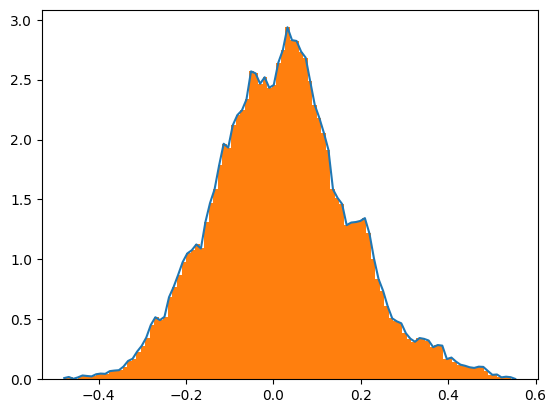

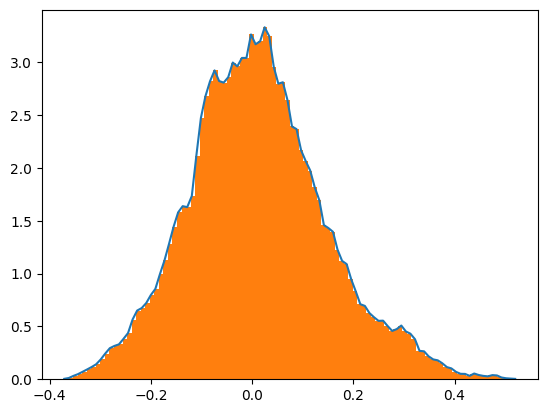

In [12]:
p,x=PDF(y1,100)
plt.plot(x,p)
plt.hist(y1,100,density=True);
plt.show()
p,x=PDF(y2,100)
plt.plot(x,p)
plt.hist(y2,100,density=True);
plt.show()

In [14]:
@njit
def cktest(y1,nbins):
    taus=np.arange(0,50,1)
    dt=[]
    for tau in taus:
        xx1=y1[:-200]
        xx2=y1[tau:-200+tau]
        xx3=y1[2*tau:-200+2*tau]
        dx1 = (max(xx1) - min(xx1))/(nbins)
        dx2 = (max(xx2) - min(xx2))/(nbins)
        dx3 = (max(xx3) - min(xx3))/(nbins)
        #print(dx1,dx2,dx3)
        pc1=jpdfc(xx3,xx2,nbins)
        # pc1=np.nansum(pc1,axis=1)*dx2
        pc2=jpdfc(xx2,xx1,nbins)
        # pc2=np.nansum(pc2,axis=0)*dx2
        pcs=jpdfc(xx3,xx1,nbins)
        # pcs=np.nansum(pcs,axis=1)*dx1
        dt.append(np.abs(np.nansum(pcs-(pc1@pc2))))
    return taus,dt


In [ ]:
ta,det=cktest(y1,10)
plt.plot(ta,det)
plt.show()
ta,det=cktest(y2,10)
plt.plot(ta,det)
plt.show()

: 

: 